In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet=gc.open('data').sheet1
rows=worksheet.get_all_values()
df=pd.DataFrame.from_records(rows[1:],columns=rows[0])

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


In [ ]:
df=df.astype(float)
df

,Input,Output
0,1.0,9.0
1,2.0,18.0
2,3.0,27.0
3,4.0,36.0
4,5.0,45.0
5,6.0,54.0
6,7.0,63.0
7,8.0,72.0
8,9.0,81.0
9,10.0,90.0


In [ ]:
df.head()

,Input,Output
0,1.0,9.0
1,2.0,18.0
2,3.0,27.0
3,4.0,36.0
4,5.0,45.0


In [ ]:
X=df[['Input']].values
y=df[['Output']].values
y

array([[  9.],
       [ 18.],
       [ 27.],
       [ 36.],
       [ 45.],
       [ 54.],
       [ 63.],
       [ 72.],
       [ 81.],
       [ 90.],
       [ 99.],
       [108.],
       [117.],
       [126.],
       [135.],
       [144.],
       [153.],
       [162.]])

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
scaler=MinMaxScaler()
X_train1=scaler.fit_transform(X_train)

In [ ]:
X_train1

array([[0.93333333],
       [0.86666667],
       [0.6       ],
       [0.        ],
       [0.46666667],
       [1.        ],
       [0.13333333],
       [0.66666667],
       [0.33333333],
       [0.53333333],
       [0.8       ],
       [0.26666667]])

In [ ]:
ai=models.Sequential([
    layers.Dense(units=9,input_shape=[1]),
    layers.Dense(units=9),
    layers.Dense(units=1)
])
ai.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 9)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118 (472.00 B)

 Trainable params: 118 (472.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ai.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai.fit(X_train1,y_train,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - loss: 12143.0967
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12125.4141
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12112.7646
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12102.2705
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12093.0225
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12084.6006
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12076.7686
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12069.3799
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12062.3408
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12055.5811
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12049.0479
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12042.7041
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12036.5205
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12030.4717
Epoch 15/1000


<Axes: >

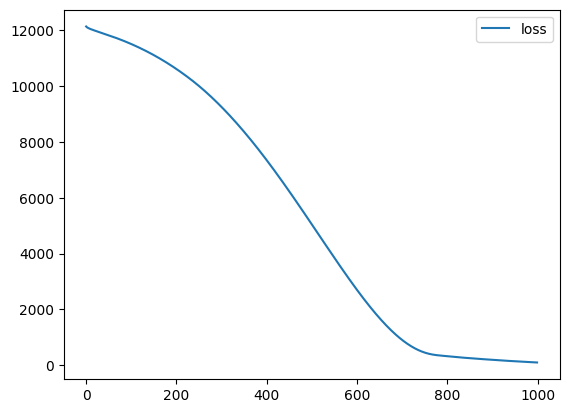

In [ ]:
loss_df=pd.DataFrame(ai.history.history)
loss_df.plot()

In [ ]:
X_test1=scaler.fit_transform(X_test)

In [ ]:
ai.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 1104.3689


1104.368896484375

In [ ]:
x_1=[[5]]
x_1_1=scaler.fit_transform(x_1)


In [ ]:
ai.predict(x_1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[46.890217]], dtype=float32)